In [1]:
# import require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from plotnine import *
%matplotlib inline

In [2]:
# import data
star_data = pd.read_csv("../input/codemlc1/train.csv")


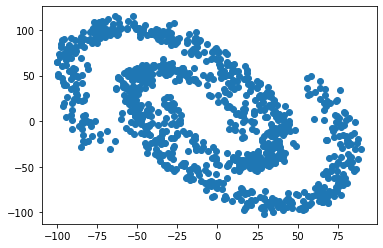

In [3]:
# Plot X,Y
plt.scatter(star_data['x'],star_data['y'])

In [4]:
# Scaling Data, only x,y,z matters
star_data = star_data.iloc[:, [1,2,3]].values
scaler = StandardScaler()
scaler.fit(star_data)
scaled_sd = scaler.transform(star_data)

# PCA algorithm
##### Principle component analysis can be used to identify patterns in multi-variable samples 
##### through principal components. It is commonly used for dimensionality reduction. It can also
##### provide insight into weights of variables affecting variation of data.
###### https://www.youtube.com/watch?v=FgakZw6K1QQ


In [5]:
pca = PCA(n_components=2)
pca.fit(scaled_sd)
scaled_sd.shape

(1000, 3)

In [6]:
# Reduce Variables Down to Two with PCA
x_pca = pca.transform(scaled_sd) 
x_pca.shape

(1000, 2)

In [7]:
# Put into data frame
df = pd.DataFrame(data=x_pca ,columns = ["primary component", "secondary component"])


# Spectral clustering
##### A clustering algorithm
###### https://towardsdatascience.com/spectral-clustering-for-beginners-d08b7d25b4d8
###### https://scikit-learn.org/stable/modules/clustering.html

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.


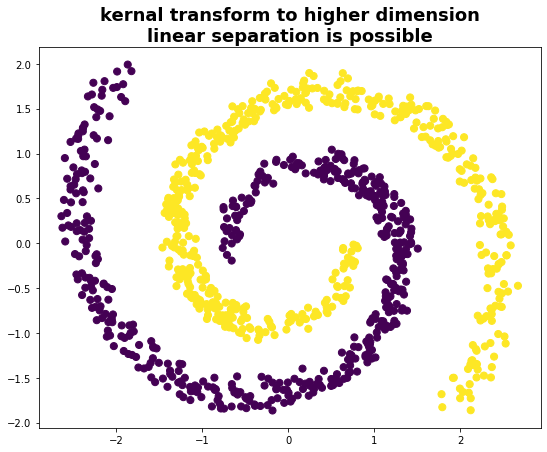

In [8]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')
labelsS = model.fit_predict(x_pca)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labelsS, s=50, cmap='viridis')